# <center> Fall 2021 CS559: Homework #1 </center>

### <center> Due: **9/23/2021 Thursday 11:59 PM** </center>



- Before you start, rename the file as *LastNameFirstName*_F21_CS559_HW1 (e.g., JangInsuk_F21_CS559_HW1). 
- Submit the assignment both in format of *ipynb* and *html*. 
    - Export the file as *HTML* as `File`>`Download as`>`HTML`. 
    - Do not need to print results of middle-process work. Only the final answers must be printed while all lines must be excuted. 
    - Clean up unnecessary lines and codes with errors. 
    - Use *Markdown* to explain answers and results. 
    - **Do not need to compress** the files. You can submit files individually.
    - Only one time submission is allowd 
- This assignment focuses on topics of linear algebra, probability theory, and EDA. 
    - For linear algebra questions, when the question says "implement", you are not allowed to use any built-in functions from `NumPy` or similar libraries that do the job. (e.g., if the question is to implement dot prodcut function, do not use `numpy.dot`). 
- This assignment should an individual work. Do not collaborate with classmates or get help from 3rd person. You may surf internet if you need to. Then site the reference. 

### Problem 1 [20 pts]
This problem task to implement functions of matrix operations - multiplication and tranpose. Please do not use numpy matrix packages in implementations.  

1-a: Implement a function `mat_product` to calculate the matrix product of two n by n arrays. [8 pts] 
$$C_{ij}=\sum_{i,j,k=1}^nA_{ik}B_{kj}$$

In [10]:
import numpy as np

In [11]:
### Code Starts Here
def mat_product(A,B):
    shape = A.shape
    N = np.zeros(shape, dtype=int)
    for i in range(shape[0]):
        for j in range(shape[0]):
            row = X[i]
            column = Y[:, j]
            for k in range(row.size):
                N[i][j] += row[k] * column[k]
    return N

1-b Generate two random 3 by 3 matrices, ${\bf X}$ and ${\bf Y}$, whose elements are from 0 to 10. Print the result. [2 pts]

In [12]:
### Test Starts Here
np.random.seed(123)
X=np.random.randint(0,10,size=(3,3))
Y=np.random.randint(0,10,size=(3,3))

In [13]:
print(mat_product(X,Y))

[[26 36  6]
 [37 36  9]
 [ 6 63  3]]


1-c Inplement a function `mat_transpose()` that transposes ${\bf X}$ and use the `mat_product` function to find the matrice of product: $Z={\bf X}^T\cdot{\bf Y}$. Compare the result with using `np.matmul()`. [10 pts]


In [14]:
### Code Starts Here
def mat_transpose(X):
    shape = X.shape
    N = np.zeros(shape, dtype=int)
    
    for i in range(shape[0]):
        for j in range(shape[0]):
            N[j][i] = X[i][j]
            
    return N
    

In [15]:
Z=mat_product(mat_transpose(X),Y)
print(Z)

[[26 36  6]
 [37 36  9]
 [ 6 63  3]]


In [32]:
### Code np.matmul() starts here
Z=np.matmul(mat_transpose(X),Y)
print(Z)

[[ 26  27   3]
 [  6  45   9]
 [  6 135  27]]


### Problem 2 [20 pts]
2-a: Create a simulatior `coin_prob(pi,n,k)` for $n$ fair coins (whose probability is $\pi=0.5$) flipping $N$ times with the number of trials increase by the intervals of 50, $t=50,100,150,200,\cdots,10000$, having $k$ number of heads. [10 pts]

   - Use the sample data to compute the maximum likelihood estiamte probabilty $s$, `np.random.binomial()`, of $\pi$.
   - Have the simulator return the result of $t$ and $s$ as a data frame "ProbTable". 
   

In [33]:
### Code Starts Here
import pandas as pd

def flip_coin(prob, times):
    
def coin_prob(pi,n,k):
    """
    Simulator to calculate a probability of n coins 
    flipping N times with t trials having k number of heads: head (=1)
    """
    ProbTable=pd.DataFrame()
    ProbTable.s = np.random.binomial(500, .5)
    ProbTablt.t = []

    return(ProbTable)

2-b: Test the simulator when $n=1$ and $k=1$. Plot the estimates of $\pi$ as a function of sample size. Indicate the expected probability using a horizontal line. [5 pts]

In [30]:
one_coin=coin_prob(pi=.5,n=1,k=1)

In [31]:
### Code Starts Here
import matplotlib.pyplot as plt

plt.plot(one_coin.t, one_coin.s, 'g-')
plt.axhline(y=5, color='r', linestyle='--')
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Probability vs. ')
plt.show()

AttributeError: 'DataFrame' object has no attribute 't'

2-c: Calculate the probability of having **1 head ($k=1$)** when 3 coins are flipped. Report the expected value.  [5 pts]

In [34]:
### Code starts here
# odds = HTT + HTH + TTH
p = 3*pow(.5,3)
print(p)

0.375


2-d: Evaluate your answer in 3-c using the simulator. Show a plot that supports your evaluation. [3 pts]

In [ ]:
three_coins=coin_prob(pi=.5,n=3,k=1)

In [ ]:
"""Plot shows here"""


### Problem 3 [20 pts]

Load the Gross Domestic Product data for the 190 ranked countries in the file **GDP.csv**. Load **Country.csv** into a DataFrame. 

In [80]:
gdp = pd.read_csv('GDP.csv', skiprows=range(5), header= None, usecols=[0,1,3,4], nrows=190,encoding='ISO-8859-1')
gdp.columns = ['CountryCode', 'Rank', 'CountryName', 'GDP']
Country = pd.read_csv('Country.csv',encoding='ISO-8859-1')

3-a: Match the `CountryCode` and merge two data frames. Call the new data frame as `Country_GDP`. How many of the IDs match?
Use the link for hints: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html [5 pts]

In [81]:
### Code Starts Here
Country_GDP= pd.merge(gdp, Country, on="CountryCode")


In [82]:
### Print the number of IDs
print(len(Country_GDP.CountryCode))


189


3-b: Use visualization to determine the number of countries by `Region`. Which region has the largest number of countries? [5 pts]

<AxesSubplot:>

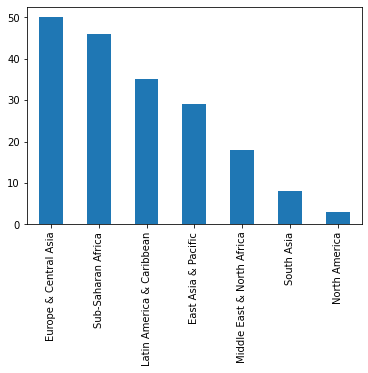

In [83]:
### Code Starts Here
Country_GDP['Region'].value_counts().plot(kind='bar')

3-c: Test how GDPs are alike between regions using two-sample **Kolmogorov-Smirnov** test `ks_2samp()`. Make a data table show $KS-test$ and $p-$ values. Evalueate the result. Expian which regions have similar distributions. [5 pts]

In [84]:
### Code Starts Here
from scipy.stats import ks_2samp

#Need to convert GDP column to int64
#Remove commas
Country_GDP.GDP = Country_GDP.GDP.apply(lambda x : x.replace(',',''))
Country_GDP = Country_GDP.astype({"GDP":np.int64})

Region = Country_GDP.groupby('Region')

unqLst = Country_GDP["Region"].unique().tolist()
base = []
for i in unqLst:
    new = []
    for j in unqLst:
        r1 = Region.get_group(i)
        r2 = Region.get_group(j)
        p = ks_2samp(r1["GDP"],r2["GDP"])
        result = '(%0.5f' % p[0]
        result += ', %0.5f)' % p[1]
        new.append(result)
    base.append(new)
    
df = pd.DataFrame(base,
                  index=pd.Index( unqLst, name='Regions (stat, p)'),
                  columns=pd.Index(unqLst))
print(df)
print()
print("Similarties between: Latin America and South Asia")

                                 North America East Asia & Pacific  \
Regions (stat, p)                                                    
North America               (0.00000, 1.00000)  (0.59770, 0.19032)   
East Asia & Pacific         (0.59770, 0.19032)  (0.00000, 1.00000)   
Europe & Central Asia       (0.56667, 0.22479)  (0.37931, 0.00676)   
Latin America & Caribbean   (0.63810, 0.12423)  (0.21379, 0.39641)   
South Asia                  (0.54167, 0.42424)  (0.34483, 0.35818)   
Middle East & North Africa  (0.66667, 0.14436)  (0.49617, 0.00479)   
Sub-Saharan Africa          (0.66667, 0.09195)  (0.37031, 0.01056)   

                           Europe & Central Asia Latin America & Caribbean  \
Regions (stat, p)                                                            
North America                 (0.56667, 0.22479)        (0.63810, 0.12423)   
East Asia & Pacific           (0.37931, 0.00676)        (0.21379, 0.39641)   
Europe & Central Asia         (0.00000, 1.00000)        (

3-d: Use `groupby()` and `agg()` to find the average and standard deviation of GDP by `income group`. [5 pts]

In [85]:
### Code Starts Here
Country_GDP.groupby(["Region"]).agg({"GDP" : {'mean', np.std}})

GDP              
                                     std          mean
Region                                                
East Asia & Pacific         1.840061e+06  6.768344e+05
Europe & Central Asia       7.654745e+05  4.272701e+05
Latin America & Caribbean   4.256162e+05  1.658813e+05
Middle East & North Africa  1.877766e+05  1.819929e+05
North America               8.897892e+06  6.023833e+06
South Asia                  6.332642e+05  2.857616e+05
Sub-Saharan Africa          6.774010e+04  2.853759e+04

### Problem 4 - Clustering Using KMeans [20 pts]

The tasks in this problem are:
- impletemenation of KMeans
- confirmation of pre-determined K value

Here, we have a given data set `HW1_Q1_0.csv` containing coordinates of x and y. 

4-a. Load the data and add feature name as X and Y for the first and second columns, respectively. (2 pts)

In [ ]:
import pandas as pd

In [ ]:
### Code starts here

4-b. Using `KMeans` from `sklearn.cluster`, determine the appropriate $K$ value for `HW2_Q1_0.csv` and report it. Explain why your pre-determined $K$ value is appropriate. The function `plot_inertia` is provided to you. (4 pts)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans()

def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    tabular_result = pd.DataFrame(inertias, 
                                  index = ["n = {}".format(i) for i in range(1, len(inertias)+1)], 
                                  columns=['Inertia'])
    
    return tabular_result

In [ ]:
### Code starts here

4-c. Make a scatter plot of y vs. x. Do you think your pre-determined $K$ value is acceptable. Explain why. If you do not think your pre-determined $K$ value is not correct, explain what a new pre-determined $K$ value must be. (4 pts) 

In [ ]:
### Code starts here

4-d. Impletement `MY_KMean` that does the KMeans clustering. When you do the implementation, you may use linear algebra built-in functions from `Numpy`. Do not use `KMeans` directly. (10 pts)

In [ ]:
### Code starts here

### Problem 5 - Principal Component Analysis [20 pts]

5-a. Run the following codes. 

In [ ]:
import numpy as np

np.random.seed(2342)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 30).T
assert class1_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 30).T
assert class2_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

5-b. PCA Implementation. Here, the descriiption of each step and part of codes. You have to fill out the rest process. [15 pts]

1. Take the dataset w/o classes. 
2. Compute the d-dimentional mean vector.
3. Compute the scatter matrix as following. 
    
$$\textbf{S}=\sum_{k=1}^N (\textbf{x}_k-\bar{\textbf{x}})(\textbf{x}_k-\bar{\textbf{x}})^T$$ 
where $\bar{\textbf{x}}$ is the mean vector. Then compute the covariance matrix using `np.cov()` function.
    
4. Compute eigenvectors and corresponding eigenvalues using np.linalg.eig(). 
5. Check the eigenvector and eigenvalue calculation. This code is provided as well as the visualization of eigenvectors. 
6. Sort the eigenvectors by descreasing eigenvalues. The idea is that since the eigenvectors will form the axes of new feature subspace, we want to drop for eigenvectors with the lowest eigenvalues that bear the least information about the distribution of the data. 
7. Choose $k$ eigenvectors with the largest eigenvalues. We are going to reduce a 3-D feature space to a 2-D feature subspace. To do so, we combine the two eigenvectors with the highest eigenvalues to construct our $d\times k$-D eigenvector matrix $\bf{W}$.
8. Transform the samples onto the new subspace. The new subspace equation is 

$${\bf y}={\bf W}^T\times {\bf x}$$

In [ ]:
### Code starts here

5-c. Using `PCA` from sklearn, make a visualization comparison with the result in 3-b and evaluation your impletemented PCA. [5 pts]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
### Code starts here